In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pygrgl

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals, normalize_genetic_values
from grg_pheno_sim.model import grg_causal_mutation_model

from test_phenotype_sim.effect_size_test import test_additive_effect_sizes


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


In [4]:
num = grg_1.num_samples
print("The number of sample nodes in this grg is " + str(num))
num_nodes = grg_1.num_nodes
print("The number of nodes in this grg is " + str(num_nodes))
num_mutations = grg_1.num_mutations
print("The number of mutations in this grg is " + str(num_mutations))

The number of sample nodes in this grg is 400
The number of nodes in this grg is 10787
The number of mutations in this grg is 10893


In [5]:
rng = np.random.default_rng()

mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [ 0.13334144 -0.88588117  0.77826928 -0.12448954  0.20639178  1.31911317
  0.88381213 -0.44699059 -0.51728374  1.3452398  -1.93504144 -1.19539217
 -0.41184355  0.52925013  0.59472302 -0.47453491  0.9599307  -0.9414041
  0.07695782 -0.59868154  1.62881815  1.21338168  0.43119503  1.01229546
  0.45933375  0.36364921  0.28832155 -1.46115536  0.15530957  0.51858796
  0.17534297  0.64147429  0.03372722 -1.87037666  0.44245493  1.54217045
  0.12212225 -0.63815139  0.83765282  0.983966   -1.01465373  0.52226689
  0.69325971 -0.95151291 -0.26142267  0.84524608 -0.88950071  1.65963423
 -0.6244963  -0.42205635  0.91030287 -0.32088983 -0.29548445 -0.29372086
 -0.73589482 -0.77750738 -0.79137104 -0.056682    2.03318924 -0.16134685
 -0.08985763  0.25156931 -1.50230725 -0.32487282  1.00624177  1.22507863
  0.69803742 -0.53825297  1.0387915  -0.51802312  0.26335174  0.51789261
 -1.86799168 -0.76940146 -0.41144571 -1.1241244   0.77527233  0.44938209
  0.8225983   0.72322069  0.

In [6]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal, random_seed=1)

trait_df_normal #this is the pandas data frame showing the results using the normal distribution

mutation_id  effect_size  causal_mutation_id
0             20    -1.810258                   0
1             28     1.151768                   0
2             62     1.681257                   0
3             76     2.346698                   0
4            119    -0.286668                   0
..           ...          ...                 ...
995        10862    -0.221163                   0
996        10874    -1.136983                   0
997        10879    -0.966133                   0
998        10883    -1.402602                   0
999        10889    -0.483777                   0

[1000 rows x 3 columns]

In [7]:
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)


In [8]:
sample_nodes_df #the pandas dataframe containing only the sample nodes and their associated genetic values, 400 sample nodes expected

sample_node_id  genetic_value  causal_mutation_id
0                 0      -4.863310                   0
1                 1     -11.638354                   0
2                 2      -6.301743                   0
3                 3       3.847395                   0
4                 4      -4.820758                   0
..              ...            ...                 ...
395             395      -8.190154                   0
396             396       3.420223                   0
397             397      -4.084002                   0
398             398     -11.381398                   0
399             399     -20.779449                   0

[400 rows x 3 columns]

In [9]:
ground_truth_genetic_value = test_additive_effect_sizes(grg_1, trait_df_normal) #this uses a recursive hard-coded method that finds each sample nodes ancestors to ensure correct effect sizes are passed down
ground_truth_genetic_value

[-4.863310045461929,
 -11.638353566173771,
 -6.301743429441365,
 3.8473953889809582,
 -4.8207577330512725,
 -12.483045444740897,
 3.9582973390295852,
 2.682916184105842,
 -6.593299996740653,
 -2.116912510097515,
 -1.6808547626443109,
 10.418203388920567,
 9.449719805698846,
 2.3137596385582757,
 -13.85338995940534,
 14.572103932065776,
 12.984315205145661,
 -0.6723184513872927,
 -5.151429668773791,
 -9.439626348536006,
 -18.574689884716477,
 -15.845338982323415,
 -18.364074864860278,
 7.711830018714408,
 -5.941979038876322,
 -17.939965021519402,
 -10.902878166416178,
 -22.712456132951715,
 -16.684332147013322,
 -5.766918933420537,
 -11.671443632330211,
 1.5489526108845286,
 -12.380086442701753,
 -3.075769967997601,
 4.547112064945489,
 -2.397032399013193,
 0.5951934626996974,
 -15.173269245697375,
 -10.573836491617042,
 -10.846244169641238,
 1.4521090925884161,
 -7.122069927511778,
 -15.516570776021727,
 -5.210787592608396,
 -15.076238711799123,
 -3.9464183729380493,
 -14.3373812526633

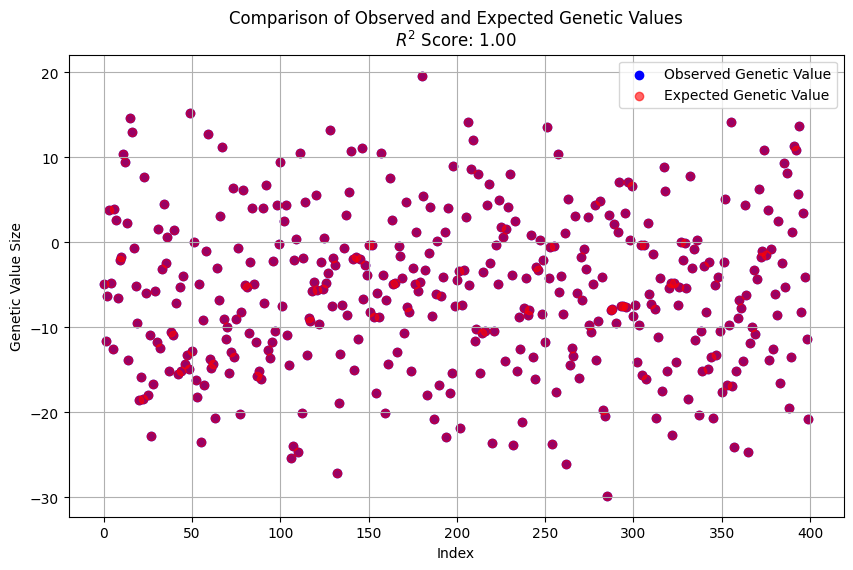

In [10]:
r2 = r2_score(ground_truth_genetic_value, sample_nodes_df['genetic_value']) #plotting the expected versus actual genetic values to verify the additive function

plt.figure(figsize=(10, 6))
plt.scatter(range(len(sample_nodes_df['genetic_value'])), sample_nodes_df['genetic_value'], color='blue', label='Observed Genetic Value')
plt.scatter(range(len(ground_truth_genetic_value)), ground_truth_genetic_value, color='red', alpha=0.6, label='Expected Genetic Value')

plt.title(f'Comparison of Observed and Expected Genetic Values\n$R^2$ Score: {r2:.2f}')
plt.xlabel('Index')
plt.ylabel('Genetic Value Size')
plt.legend()

plt.grid(True)

plt.show()

In [11]:
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #this combines the sample nodes into individual nodes

individual_genetic_value_df #half the number of individuals as compared to samples, due to diploid case

individual_id  genetic_value  causal_mutation_id
0                0     -16.501664                   0
1                1      -2.454348                   0
2                2     -17.303803                   0
3                3       6.641214                   0
4                4      -8.710213                   0
..             ...            ...                 ...
195            195      12.536488                   0
196            196      16.549154                   0
197            197       5.463626                   0
198            198      -0.663779                   0
199            199     -32.160847                   0

[200 rows x 3 columns]

In [12]:
normalized_genetic_value_df = normalize_genetic_values(individual_genetic_value_df) #sets mean to 0 and variance to 1 by default
normalized_genetic_value_df

individual_id  genetic_value  causal_mutation_id
0                0      -0.375568                   0
1                1       0.686386                   0
2                2      -0.436209                   0
3                3       1.373995                   0
4                4       0.213453                   0
..             ...            ...                 ...
195            195       1.819668                   0
196            196       2.123019                   0
197            197       1.284972                   0
198            198       0.821750                   0
199            199      -1.559377                   0

[200 rows x 3 columns]

In [13]:
new_mean = normalized_genetic_value_df['genetic_value'].mean()
new_std = normalized_genetic_value_df['genetic_value'].std()
new_var = normalized_genetic_value_df['genetic_value'].var()

print("The new mean of the genetic values is " + str(new_mean))
print("The new standard deviation of the genetic values is " + str(new_std))
print("The new variance of the genetic values is " + str(new_var))

The new mean of the genetic values is -1.1990408665951691e-16
The new standard deviation of the genetic values is 0.9999999999999998
The new variance of the genetic values is 0.9999999999999997
